Bayesian GLMs in PyMC3
----------------------

With the new GLM module in PyMC3 it is very easy to build this and much more complex models.

First, lets import the required modules.

In response to my blog posts on Bayesian GLMs Bob Tolbert from EyesOpen asks: 
"The problem I'm having is understanding out to use a model from glm for making future predictions. And how to understand if the model is any good."

In [1]:
%matplotlib inline 
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt

### Generating data

Create some toy data to play around with and scatter-plot it. 

Essentially we are creating a regression line defined by intercept and slope and add data points by sampling from a Normal with the mean set to the regression line.

In [2]:
size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)

def gen_data(x):
    # y = a + b*x
    true_regression_line = true_intercept + true_slope * x
    # add noise
    y = true_regression_line + np.random.normal(scale=.5, size=len(x))
    return y

y = gen_data(x)
data = dict(x=x, y=y)
x_pred = np.random.rand(20)
y_pred = gen_data(x_pred)

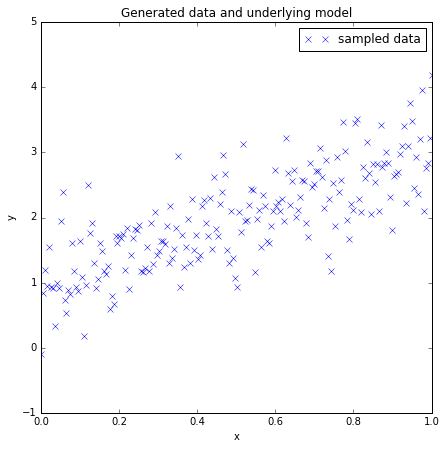

In [3]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x, y, 'x', label='sampled data')
plt.legend(loc=0);

### Estimating the model

In [4]:
with pm.Model() as model:
    # specify glm and pass in data. The resulting linear model, its likelihood and 
    # and all its parameters are automatically added to our model.
    like, intercept, slope, sigma = pm.glm.glm('y ~ x', data)
    predict = pm.Normal('predict', mu=intercept + x_pred * slope, 
                        sd=sigma)
    step = pm.NUTS() # Instantiate MCMC sampling algorithm
    trace = pm.sample(2000, step, progressbar=False) # draw 2000 posterior samples using NUTS sampling

/home/wiecki/miniconda3/lib/python3.5/site-packages/pymc/Model.py:94: UserWarning: The MCMC() syntax is deprecated. Please pass in nodes explicitly via M = MCMC(input).
  'The MCMC() syntax is deprecated. Please pass in nodes explicitly via M = MCMC(input).')


AttributeError: __exit__

In [ ]:
for t in trace['predict'][::100]:
    plt.plot(x_pred, t, 'x', color='grey')
    
plt.plot(x_pred, y_pred, 'bo', ms=10, alpha=.5);

In [ ]:
plt.figure(figsize=(7, 7))
traceplot(trace)
plt.tight_layout();

## Summary